In [133]:
import torch 
import torch.nn as nn
import torchvision.transforms as tf
import torch.optim as optim
from torch.utils.data import Dataset, random_split, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR

plt.rc('axes', axisbelow=True)

# свой собственный датасет с чтением из CSV и распределением по кортежам
class CustomDataset(Dataset):
    def __init__(self, csv_path):
        self.data = pd.read_csv(csv_path, dtype=float)
        self.to_tensor = tf.ToTensor()
        # подмассивы данных и меток
        self.X = self.data.iloc[:, :-1].to_numpy()
        self.Y = self.data.iloc[:, -1].to_numpy()
        # словарь имён и меток классов
        self.label_dict = {-1: 0, 1: 1}
        
    def __getitem__(self, index):
        #tensor_x = self.to_tensor(X[index])
        x_item = self.X[index]
        label = self.Y[index]
        return (x_item, self.label_dict[label])

    def __len__(self):
        return len(self.data)
    
# нейросеть
class SingleNeuronNetwork(nn.Module):
    def __init__(self):
        super(SingleNeuronNetwork, self).__init__()
        # слой из единственного нейрона
        self.layer = nn.Linear(2, 1)
        
    def forward(self, x):
        x = self.layer(x)
        return x
    
    def predict(self, x):
        pred = nn.functional.softmax(self.forward(x))
        ans = []
        for t in pred: 
            if (t[1] > t[0]):
                ans.append(1)
            else:
                ans.append(0)
        return torch.tensor(ans)
    
# Тренировка модели
def train(model, dataloader, device, optimizer, curr_epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(dataloader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data.float())
        loss = nn.functional.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
# Тестирование модели
def test(model, dataloader, device):
    model.eval()
    test_loss = 0.
    correct = 0
    with torch.no_grad():
        for data, target in dataloader:
            data, target = data.to(device), target.to(device)
            output = model(data.float())
            test_loss += nn.functional.nll_loss(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    print(f'Test: loss: {test_loss:.2}, Accuracy: {correct}/{len(dataloader)} {correct/len(dataloader)}')

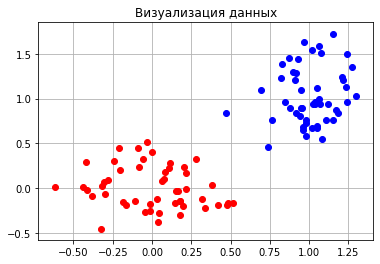

In [134]:
# визуализация данных
data = pd.read_csv('nn_0.csv')
plt.scatter(x=data[data['class'] == 1].iloc[:, 0], y=data[data['class'] == 1].iloc[:, 1], color='red')
plt.scatter(x=data[data['class'] == -1].iloc[:, 0], y=data[data['class'] == -1].iloc[:, 1], color='blue')
plt.grid(True)
plt.title('Визуализация данных')
plt.show()

In [137]:
# Параметры
test_size = 20
train_size = 80
batch_size = 4
learning_rate = 0.1
epochs = 3
gamma = 0.7

# построение привычных X и Y
X = data.iloc[:, :-1].to_numpy()
X = torch.from_numpy(X).type(torch.FloatTensor)
Y = data.iloc[:, -1].to_numpy()
Y = (Y + 1) / 2
Y = torch.from_numpy(Y).type(torch.LongTensor)

# формирование датасета для загрузки в модель
dataset = CustomDataset('nn_0.csv')

# разделение датасета
train_dataset, test_dataset = random_split(dataset, [80, 20])
# тренировочный и тестовый загрузчики данных
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

    
model = SingleNeuronNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch_num in range(1, epochs+1):
    y_pred = model.forward(X)
    loss = criterion(y_pred, Y)
    print(f'Epoch {epoch_num}. Loss: {loss.item()}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    
    



IndexError: Target 1 is out of bounds.

TypeError: 'DataLoader' object is not callable

In [126]:
for (a, b) in train_dataloader:
    print(a, b)
    print(model(a.float()))

tensor([[-0.3835, -0.0893],
        [-0.3223, -0.4514],
        [ 1.0501,  0.6910],
        [ 0.5177, -0.1633]], dtype=torch.float64) tensor([1, 1, 0, 1])


TypeError: forward() takes 2 positional arguments but 3 were given